<table align="center" width="100%">
    <tr>
        <td width="30%">
            <img src="https://miro.medium.com/v2/resize:fit:1400/1*DsOKWVMAbydzfsXI2A9pMQ.png">
        </td>
        <td>
            <div align="center">
                <font color="#7F0542" size="6">
                    <b>Feature Engineering - 02</b>
                </font>
            </div>
        </td>
    </tr>
</table>

## <font color='red'>**Please note that any topics that are not covered in today's lecture will be covered in the next lecture.**</font>

## <font color='blue'>**Content**</font>

1. Recap of previous lecture
2. Missing Values
3. Outlier Treatment
4. Categorical to Numerical
5. Normalisation
6. Standardization

## <font color='blue'>**Recap of Previous lecture** </font>

- As we saw in an example in the last class weight and Fitness are not directly related and Weight and fitness is not directly related.   

- How do we make the best use of the available feature so that I can create some target variable. So we create one feature "BMI" using the existing features which are related to fitness.

- On similar lines, we took a House Loan dataset. We began by analysing individual features like "ApplicantIncome" and "TotalIncome," assessing their impact on "Loan_Status" and discovering potential counterintuitive relationships.

- Employing techniques such as binning and chi-square tests, we gained insights into feature independence.  

- Recognizing the importance of factors like "Loan_Amount" and "Loan_Amount_Term," we created new features, such as "Able_to_pay_EMI," providing a nuanced perspective on loan approval likelihood.



Let's continue from where we left in previous class by reading the updated data that we saved in the previous class.

##### <font color='purple'>Load data and libraries</font>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1JR9TDe1BQN9crA5n6JrL_clnNY1AhebJ -O updated_loan.csv

--2024-01-18 10:14:52--  https://drive.google.com/uc?id=1JR9TDe1BQN9crA5n6JrL_clnNY1AhebJ
Resolving drive.google.com (drive.google.com)... 74.125.135.102, 74.125.135.100, 74.125.135.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.135.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1JR9TDe1BQN9crA5n6JrL_clnNY1AhebJ [following]
--2024-01-18 10:14:52--  https://drive.usercontent.google.com/download?id=1JR9TDe1BQN9crA5n6JrL_clnNY1AhebJ
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.99.132, 2607:f8b0:400e:c0c::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.99.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67001 (65K) [application/octet-stream]
Saving to: ‘updated_loan.csv’

updated_loan.csv    100%[===================>]  65.43K  --.-KB/s    in 0.001s  

2024-01-18 10:14:53 (94.3 MB/s) 

In [ ]:
# read the updated data

data = pd.read_csv('/content/updated_loan.csv')
data.shape

(614, 18)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,Medium,5849.0,High,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,6091.0,High,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,6000.0,High,4.700000,391.666667,1


Now, big questions come up  

- We created columns and we understood loans, I also want to understand different columns.   

- <font color='purple'>We want to understand how "Dependents" and "Loan_status" are related to each other.</font>

what will we do in this case?  

In [ ]:
data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

We'll simply replace the "3+" values with "3" to make it integer

In [ ]:
# replacing 3+ with 3
data['Dependents'].replace('3+',3,inplace=True)

In [ ]:
data["Dependents"].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

- Now we have four groups here: 0,1,2,3  

- We want to understand whether this is an important feature depending on our target variable which is "Loan_Status"  

> Which test we can perform?

- Anova, right!

<font color='purple'>Now what about "**Credit_History**"</font>

In [ ]:
data["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

- We can compare each column with our target variable by doing specific tests based on the columns but it's a tedious process.

- As a data scientist, you have to do it to  
- Why do we have to do it?  

Suppose we have features:  
- $f_1, f_2, f_3, f_4, ..., f_n$ --> $Target$  
  - Now if $f_1$ is independent to $Target$ means it has no impact on the target variable so should we keep that feature?  
  - This is the question for which you'll get the answers in depth in upcoming modules  

Here the concept of **"Feature Selection"** comes up.

---
---

## <font color='blue'>**Missing Values**</font>

In [ ]:
# how many percentage of data is missing in each column

missing_value = pd.DataFrame({
    'Missing Value': data.isnull().sum(),
    'Percentage': (data.isnull().sum() / len(data))*100
})
missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
Credit_History,50,8.143322
EMI,36,5.863192
Loan_Amount_per_year,36,5.863192
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
CoapplicantIncome,0,0.000000


##### <font color='purple'>How To Handle Missing values?</font>

- We know we have 2 types of variables: Numerical and Categorical  

- If our variable is **Numerical** what types of imputation do we generally do to impute the missing values  

  1. Mean
  2. Median
  3. Mode
  4. Constant value

- If a variable is **Categorical**

  1. Mode

<font color='purple'>What techniques do we use to find missing values:</font>

- To identify missing values, we often use the functions `isna()` or `isnull()`.
- For filling in missing values, we commonly use `fillna()`.
- To remove rows or columns with missing values, we use `dropna()`.

Now, there is one advanced technique the <font color='orange'>**Simple Imputer**</font>, which is part of a powerful library called "Scikit-learn".

  - This library covers a wide range of algorithms, from regression to classification and clustering
  - Importantly, it supports "Pre-processing," a crucial step that includes tasks like Feature Engineering.


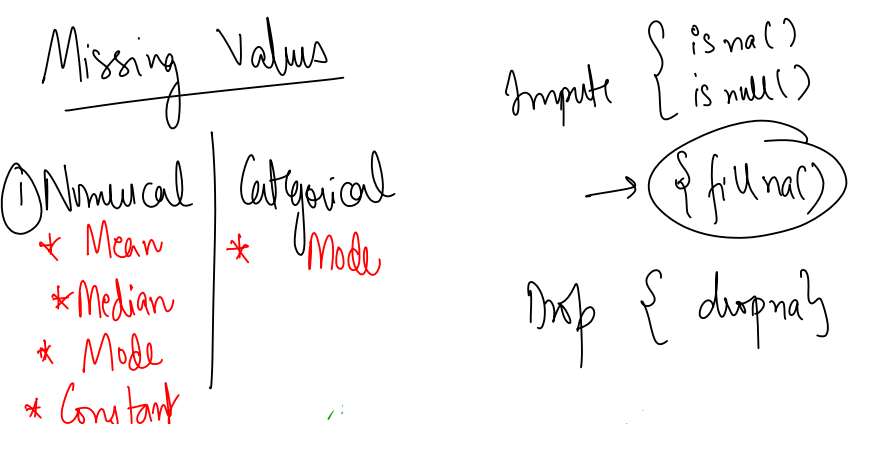

Before understanding what we need let's first work with a single column.

In [ ]:
data["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
data["Credit_History"].isna().sum()

50

In [ ]:
data.shape

(614, 18)

Out of 614 values, 50 values are missing from the "Credit History" column which is a huge number so we can't just drop the missing values.

So how do I replace these missing values?

<font color='purple'>First, tell me whether **"Credit History"** is a categorical column or a Numerical column?</font>
- It is represented using Numbers **0 & 1** but the meaning behind this column is actually **categorical**.
- So in this column, we have values like:  
  - 0 ( representing no credit history)
  - 1 ( representing a credit history)
  - Missing values  

<font color='purple'>What should we replace these missing values with?</font>

- One idea is, let's replace it with a new value like "2" so that we know that rows having value **2** were missing values.
  - But will this solve the issue maybe, maybe not.
  - or else can we replace it with "Mode" as it is a categorical variable?  
- We know the most occurring value is 1 so will it make sense to replace the missing values with 1?  
  - Do you agree with that replacing it with 1 will not make sense here,
  - Because assuming that we have a credit history of missing values is more dangerous than we don't have a credit history

<font color='Red'>Note:</font> This is new learning for us here while working with features we have to understand columns in a greater depth  

- If we are replacing with 1, then we are making this data biased towards 1
- The best 2 possible ways are 1st to replace with "0" as the values are missing and there will be some reason why these values kept missing by the applicant so it is safer to replace with 0 but this will also create problems.  
- The 2nd way is to replace it with another value like "2" and keep that in mind that it represents the missing values.

<font color='purple'>But we first need to understand that is "Credit History" a significant feature with respect to our target variable.</font>
- We'll first carry out tests before imputing the missing data and checking whether the columns are independent or dependent.  
- If columns are dependent on each other then we'll do all this imputation and if not then we can simply drop the missing values.

In [ ]:
pd.crosstab(data["Credit_History"],data["Loan_Status"])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [ ]:
from scipy.stats import chi2_contingency

# H0: Credit history  and Loan status is independent

chi2_contingency(pd.crosstab(data['Credit_History'], data['Loan_Status']))

Chi2ContingencyResult(statistic=174.63729658142535, pvalue=7.184759548750746e-40, dof=1, expected_freq=array([[ 28.2464539,  60.7535461],
       [150.7535461, 324.2464539]]))

- As we can see p-value is very very low which is $7.18 *10e^{-40} $  

- It means we **reject the null hypothesis** means Credit history and Loan status are **not independent**. They both are dependent on each other.

Let's plot the countplot

<Axes: xlabel='Credit_History', ylabel='count'>

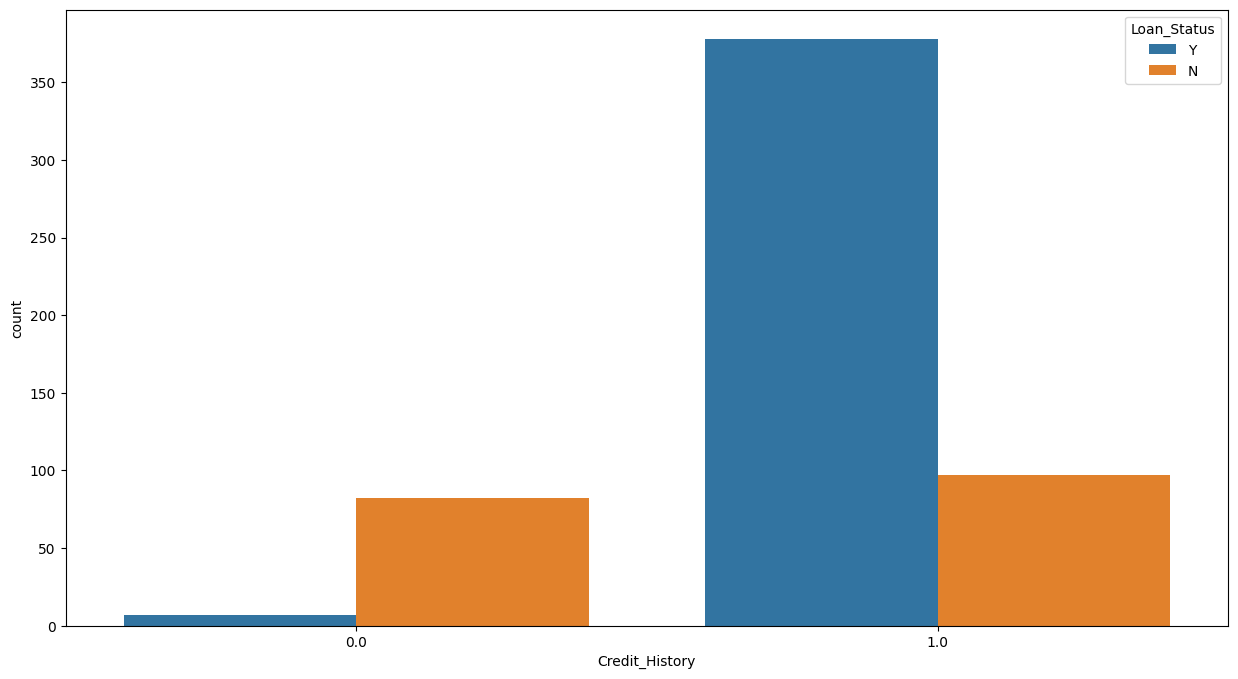

In [ ]:
sns.countplot(x= data["Credit_History"],hue=data["Loan_Status"])

- In this, we can observe that very few individuals got their loan application approved when the "Credit history" is 0.
  - means no credit history compared to the individual who has a credit history means
- Most of them got their loan approved.

This type of chart can help us to make your manager or non-tech person understand the data.

##### <font color='purple'> Now coming back to missing values in "Credit History", let's try replacing them with **2** using `fillna()`</font>

In [ ]:
data["Credit_History"]=data["Credit_History"].fillna(2)
data["Credit_History"].value_counts()

1.0    475
0.0     89
2.0     50
Name: Credit_History, dtype: int64

- Now again we can create those groups and compare the columns by conducting tests and calculating p-values  
- Similarly, can we find this for other columns as well?
- Let's look into it

In [ ]:
data["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
data["Self_Employed"].isna().sum()

32

Here we have **32** missing values and we know that this is the categorical data  

So, how do we replace the missing values?  

> "Self Employed":     

1. Yes
2. No
3. Missing values, should be replaced with "Others" or use **Mode**

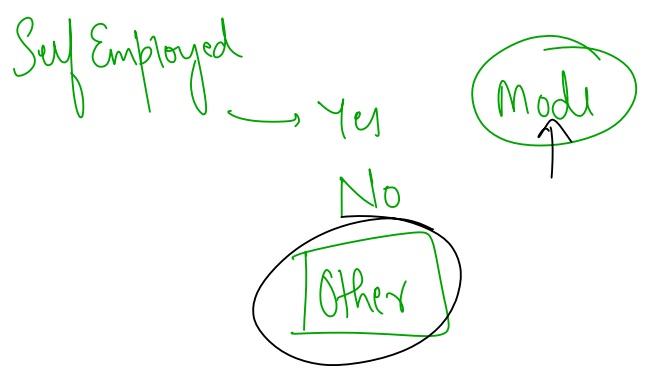

First let's find out the `p-value` before imputing missing values

In [ ]:
pd.crosstab(data['Self_Employed'], data['Loan_Status'])

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


In [ ]:
chi2_contingency(pd.crosstab(data['Self_Employed'], data['Loan_Status']))

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[157.21649485, 342.78350515],
       [ 25.78350515,  56.21649485]]))

There is something wrong here, the p-value is 1.0 which is very high means it is saying that we failed to reject the null hypothesis and these two columns are independent to each other  

- We can fill missing values with anything as it is independent so let's try to fill it with "Other" and check again

In [ ]:
data["Self_Employed"]=data["Self_Employed"].fillna("Other")

In [ ]:
data["Self_Employed"].isna().sum()

0

In [ ]:
data["Self_Employed"].value_counts()

No       500
Yes       82
Other     32
Name: Self_Employed, dtype: int64

As you can see all the missing values are being replaced with "Other".

In [ ]:
chi2_contingency(pd.crosstab(data['Self_Employed'], data['Loan_Status']))

Chi2ContingencyResult(statistic=0.15849843135909122, pvalue=0.9238096679003514, dof=2, expected_freq=array([[156.35179153, 343.64820847],
       [ 10.00651466,  21.99348534],
       [ 25.64169381,  56.35830619]]))

- The P-value is still high, and we **fail to reject** the null hypothesis.

- This is the one way of filling values using fillna()  

Let's look into other techniques as well

#### <font color='purple'>Simple Imputer</font>

In [ ]:
from sklearn.impute import SimpleImputer

Let us create one simple sample dataframe containing the missing values as **np.nan**



In [ ]:
a = pd.DataFrame([10, 10, 20, 10, 30, 10, np.nan, 50])
a

,0
0,10.0
1,10.0
2,20.0
3,10.0
4,30.0
5,10.0
6,NaN
7,50.0


In [ ]:
a.mean()

0    20.0
dtype: float64

- Here if we calculate the mean it'll ignore the missing values and will consider only non-missing values.  
  - This is not good so how do I work with it?

As we know in Python class name starts with a Capital so SimpleImputer is the class in Python.  

- Now, strategy is the important parameter of this class which is basically an "Imputation" strategy means how you want to impute the missing values.

- Its default value is "mean" but we can pass anything according to our needs like "median". "most_frequent", "constant".


###### <font color='green'>Strategy = Mean</font>

In [ ]:
SimpleImputer(strategy="mean").fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [20.],
       [50.]])

- Here we are calling fit_transform(), later in ML we are going to learn 3 functions one is "fit", one is "transform" and if you combine both it'll become fit_transform.  

- It is similar to "apply". Here we are basically filling the missing value with the "mean" of data and as you can see np.nan is replaced by "20".

In [ ]:
a.mode()

,0
0,10.0


###### <font color='green'>Strategy = most_frequent(mode)</font>

Here we are imputing the missing value with the most frequent value in the dataframe which is 10.

In [ ]:
SimpleImputer(strategy="most_frequent").fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [10.],
       [50.]])

###### <font color='green'>Strategy = Constant</font>

Imputing missing values with some constant value. We have to pass the value in the fill_value parameter.

In [ ]:
SimpleImputer(strategy="constant",fill_value=1000).fit_transform(a)

array([[  10.],
       [  10.],
       [  20.],
       [  10.],
       [  30.],
       [  10.],
       [1000.],
       [  50.]])

Now we must be thinking what's new in this? we already know that  

- Generally while working with the models we don't do imputation one by one on each column   

- Instead, once we identify patterns in some set of columns that in this set we are going to use mean imputation or in another set of columns we are going to use median imputation   

- So we create a list of columns then we create an instance of the class "SimpleImputer" and define the <font color='green'>strategy = median.</font>

Then we can run the loop and replace all the missing values in one go. Also, this instance/object is reusable too.

In [ ]:
# Missing numeric columns

# set of columns
num_missing = ['EMI', 'Loan_Amount_per_year',  'LoanAmount',  'Loan_Amount_Term']

# instance of simple imputer class with a median strategy
median_imputer = SimpleImputer(strategy = 'median')

for col in num_missing:
    data[col] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(data[col])))

In [ ]:
cat_missing = ['Gender', 'Married','Dependents']

freq_imputer = SimpleImputer(strategy = 'most_frequent') # mode
for col in cat_missing:
    data[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data[col])))

Now,Let's see if there are any missing values present in the data.

In [ ]:
data.isna().sum()

Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
Income_bin              0
TotalIncome             0
TotalIncome_bin         0
Loan_Amount_per_year    0
EMI                     0
Able_to_pay_EMI         0
dtype: int64

<font color='purple'>**No More Missing Values.**</font>

But understanding what to replace the missing value with is more important than running this code   

Why, because we are artificially creating the data using fillna() so it should be best otherwise it can affect the performance of our model.

---

## <font color='blue'>**Outlier Treatment**</font>

We saw how to address the missing values using the technique like Simple Imputer. Now, what do we do for extreme values?

Outliers can significantly impact the analysis and performance of machine learning models.

Understanding how to identify and handle outliers ensures our models are robust, accurate, and better able to generalize patterns in the data.

It's a key aspect of data preprocessing that contributes to the reliability and effectiveness of our analyses.

<font color='purple'>An outlier is an observation in the data that lies at an abnormal distance from other values. The presence of an outlier may skew the results. Hence it is necessary to remove them.</font>

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,128.0,30.0,1.0,Urban,Y,Medium,5849.0,High,4.383333,365.277778,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,6091.0,High,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,6000.0,High,4.700000,391.666667,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    object 
 1   Married               614 non-null    object 
 2   Dependents            614 non-null    object 
 3   Education             614 non-null    object 
 4   Self_Employed         614 non-null    object 
 5   ApplicantIncome       614 non-null    int64  
 6   CoapplicantIncome     614 non-null    float64
 7   LoanAmount            614 non-null    float64
 8   Loan_Amount_Term      614 non-null    float64
 9   Credit_History        614 non-null    float64
 10  Property_Area         614 non-null    object 
 11  Loan_Status           614 non-null    object 
 12  Income_bin            614 non-null    object 
 13  TotalIncome           614 non-null    float64
 14  TotalIncome_bin       614 non-null    object 
 15  Loan_Amount_per_year  6

In [ ]:
# Change the data type of a specific column from category to object
data['Income_bin'] = data['Income_bin'].astype('object')
data['TotalIncome_bin'] = data['TotalIncome_bin'].astype('object')

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,128.0,30.0,1.0,Urban,Y,Medium,5849.0,High,4.383333,365.277778,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,6091.0,High,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,6000.0,High,4.700000,391.666667,1


In [ ]:
# filter the numeric variables from the data
df_num = data.select_dtypes(include = np.number)

In [ ]:
df_num.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'TotalIncome',
       'Loan_Amount_per_year', 'EMI', 'Able_to_pay_EMI'],
      dtype='object')

In [ ]:
df_num.drop(['Credit_History','Able_to_pay_EMI'],axis=1,inplace=True)
df_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,TotalIncome,Loan_Amount_per_year,EMI
0,5849,0.0,128.0,30.0,5849.0,4.383333,365.277778
1,4583,1508.0,128.0,30.0,6091.0,4.266667,355.555556
2,3000,0.0,66.0,30.0,3000.0,2.200000,183.333333
3,2583,2358.0,120.0,30.0,4941.0,4.000000,333.333333
4,6000,0.0,141.0,30.0,6000.0,4.700000,391.666667


### <font color='purple'>Outliers visualisation using Boxplots</font>

- The boxplot() in seaborn plots a box plot of the specified data.
- The box represents the quartiles of the data while the whiskers extend to show the rest of the distribution.
- The points that are determined to be outliers are identified using the interquartile range (IQR) method.

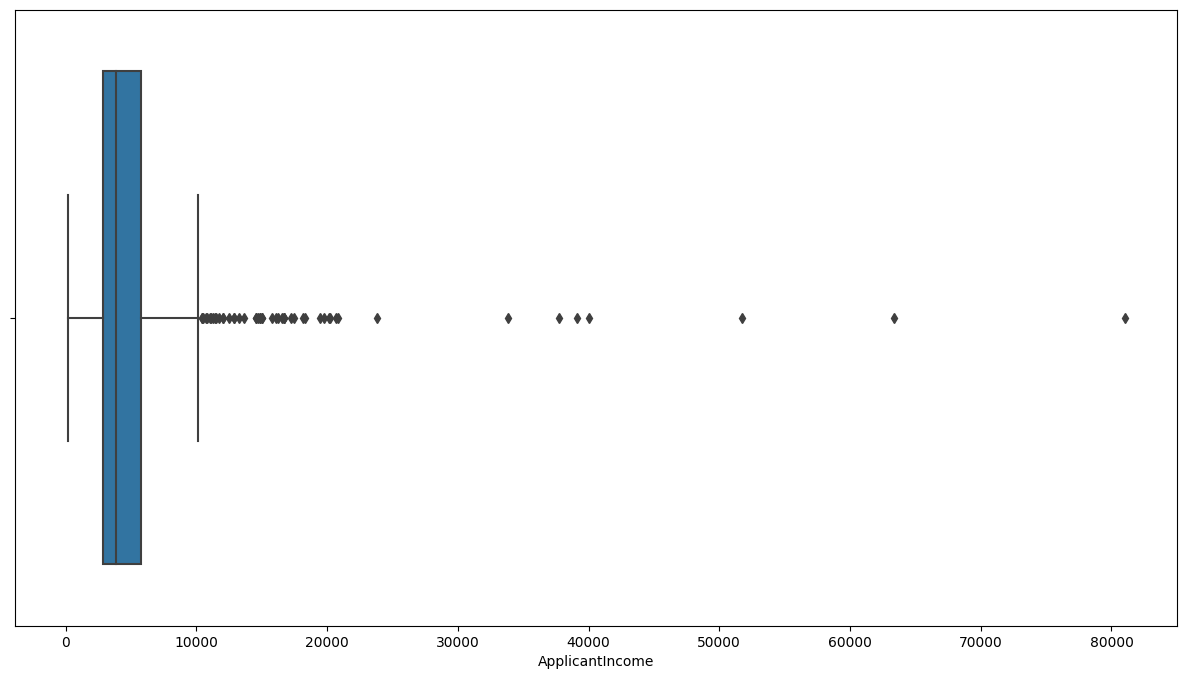

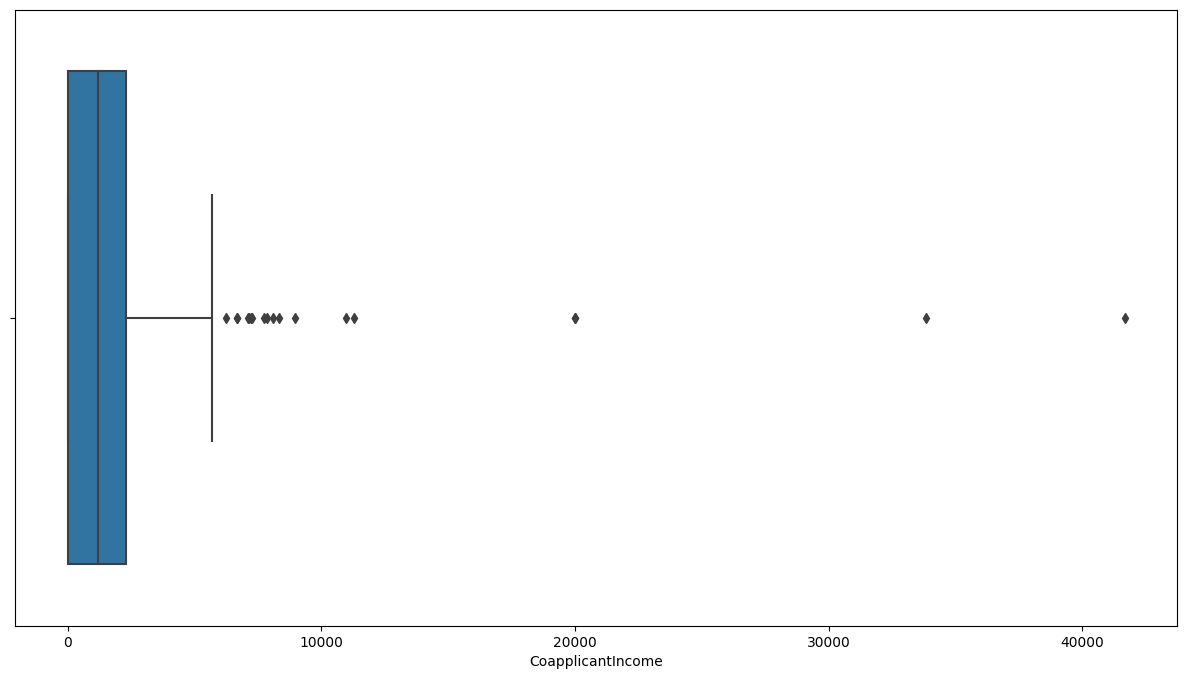

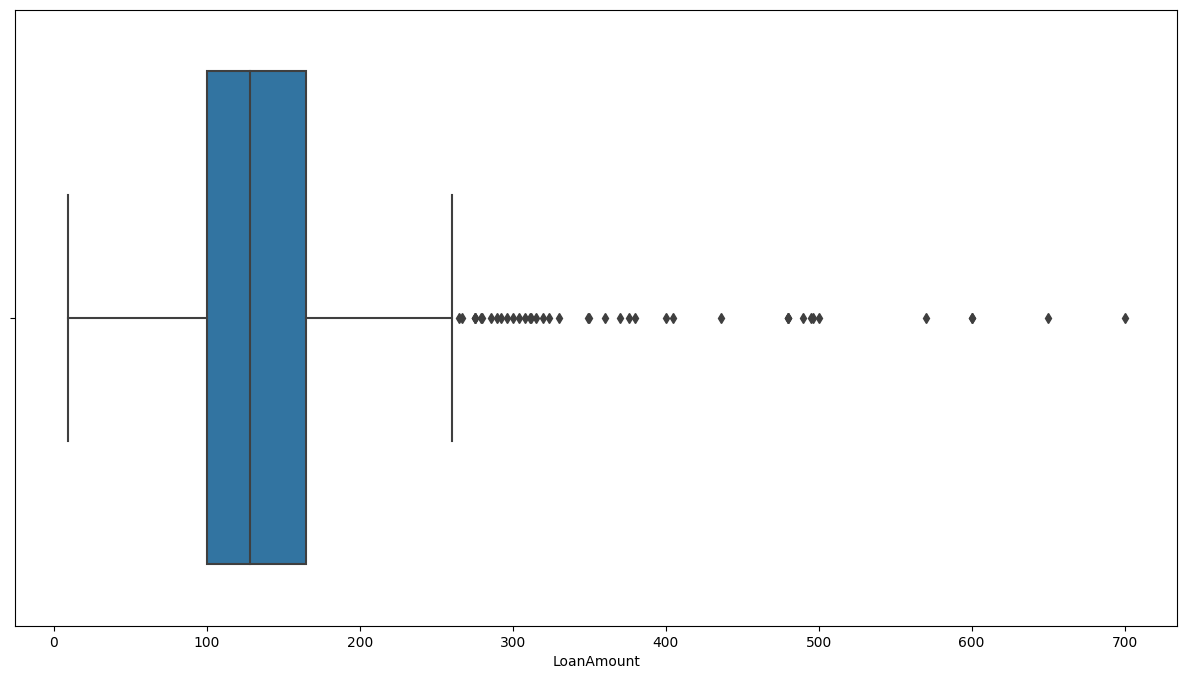

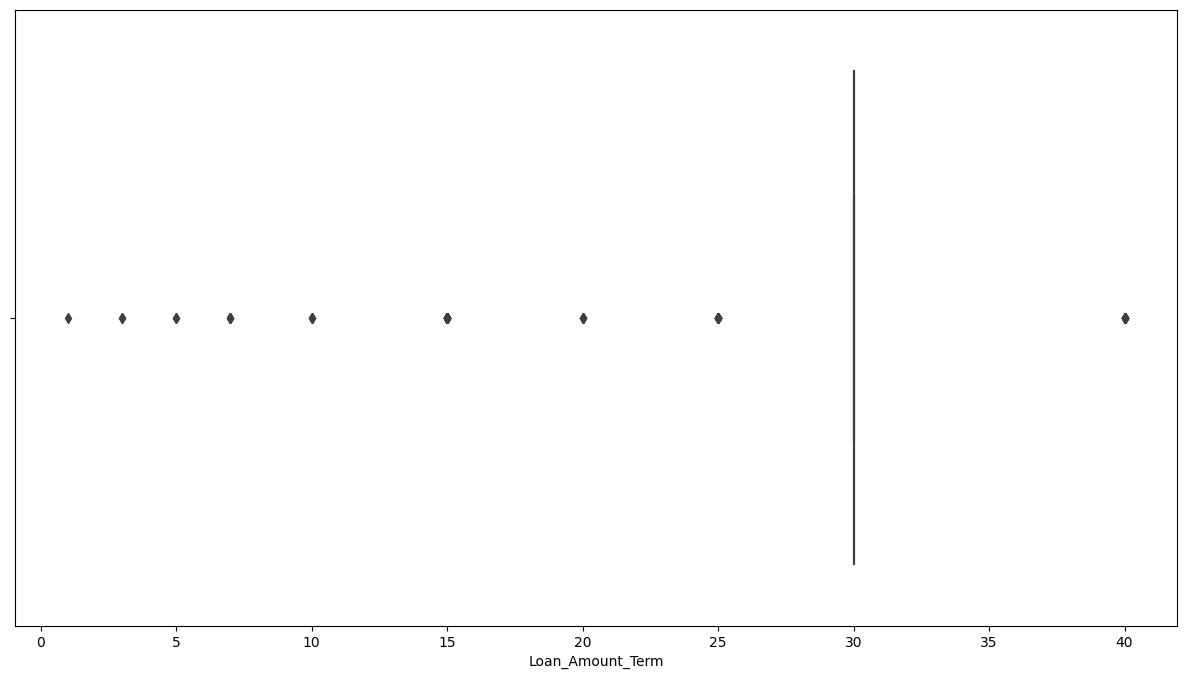

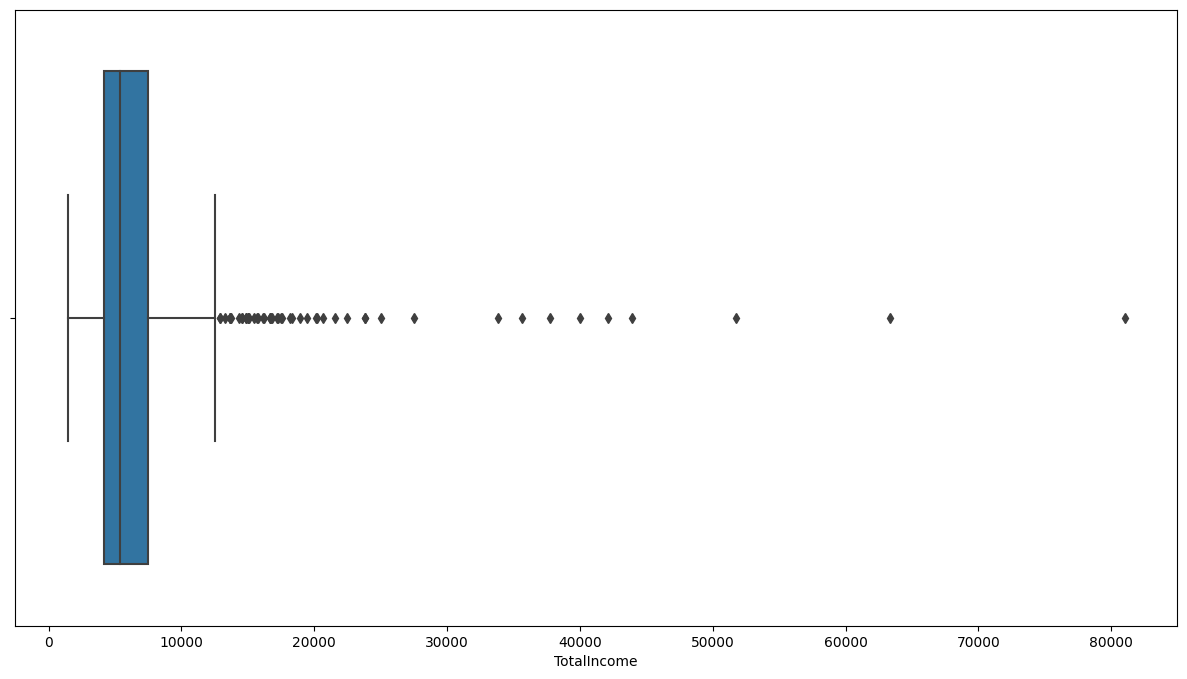

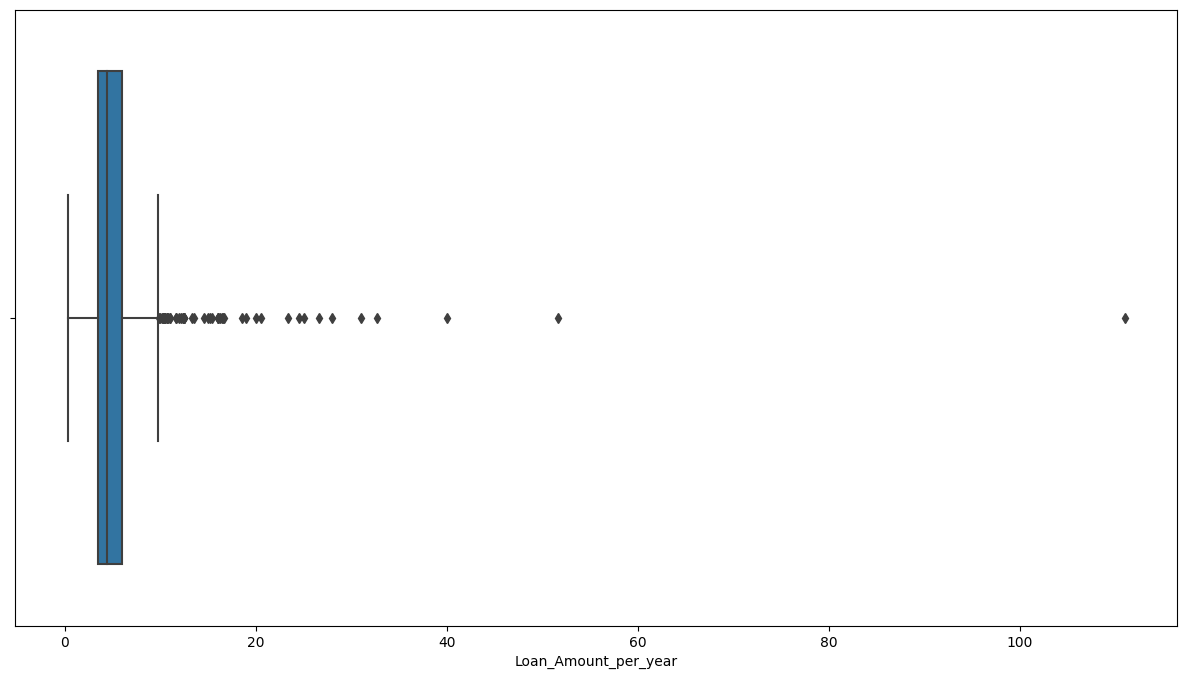

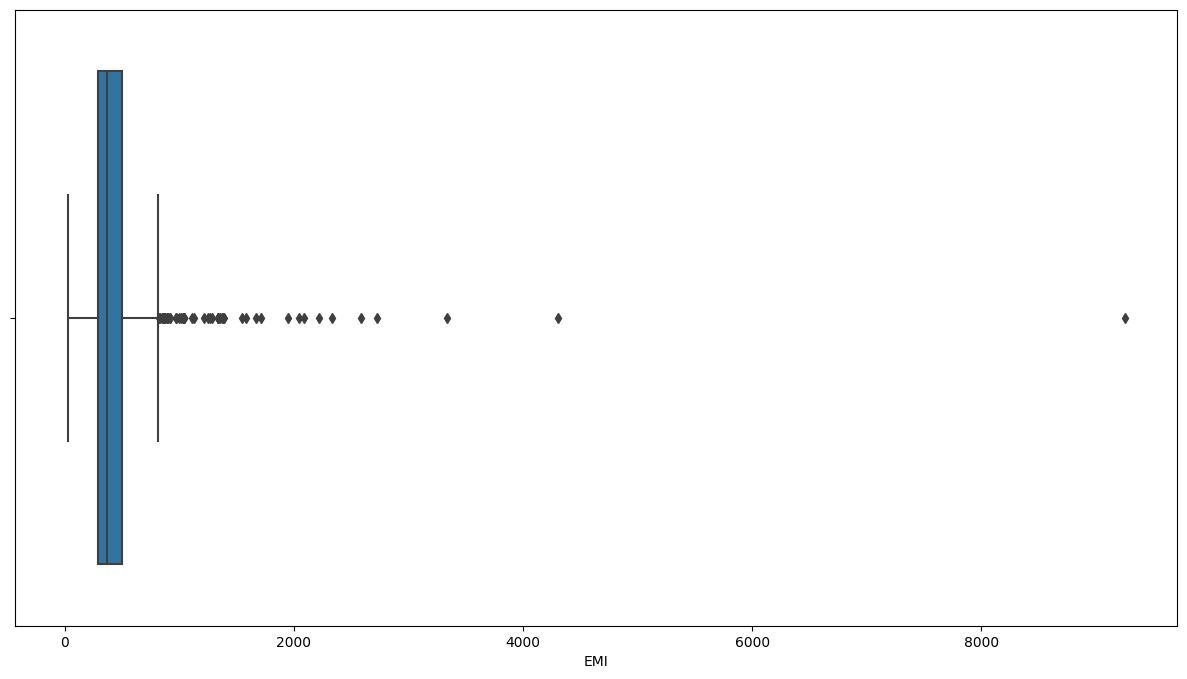

In [ ]:
for col in enumerate(df_num):
    sns.boxplot(x=col[1],data=df_num)
    plt.show()

From the above plots, we can see that there are outliers present in the data.

There are **two** methods with which we can treat the outliers:

1. <font color='purple'>IQR (Interquartile Range) Method:</font>

- Calculate the IQR (the difference between the 75th and 25th percentiles) and remove values outside a specified range (e.g., 1.5 times IQR).

2. <font color='purple'>Z-Score or Standard Score:</font>

- Identify and remove data points with z-scores beyond a certain threshold (e.g., ±3).

### <font color='purple'>IQR (Interquartile Range) Method</font>

In [ ]:
# obtain the first quartile
Q1 = df_num.quantile(0.25)

# obtain the third quartile
Q3 = df_num.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

ApplicantIncome         2917.500000
CoapplicantIncome       2297.250000
LoanAmount                64.500000
Loan_Amount_Term           0.000000
TotalIncome             3355.750000
Loan_Amount_per_year       2.500000
EMI                      208.333333
dtype: float64


In [ ]:
data.shape

(614, 18)

The shape of our dataset is (614, 18), which means it contains 614 rows and 18 columns.


In [ ]:
df_iqr=data[~((df_num < (Q1-1.5*IQR))|(df_num > (Q3 + 1.5*IQR))).any(axis=1)]

---  

***Instructor's note:*** Explanation of code:  

- `(df_num < (Q1 - 1.5 * IQR))` checks for values below the lower bound (Q1 - 1.5 * IQR).  

- `(df_num > (Q3 + 1.5 * IQR))` checks for values above the upper bound (Q3 + 1.5 * IQR).  

- `~((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR)))`:
  
  - The ~ operator negates this condition, selecting rows where none of the values are below the lower bound or above the upper bound.   
  
  - In other words, it selects rows that are within the lower and upper range defined by the interquartile range (IQR) method.

- `any(axis=1)`:   

  - The any(axis=1) checks if any True value exists along the rows. If a row has at least one True value (indicating it's an outlier), the negation will make it False, and vice versa.

---

In [ ]:
df_iqr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,128.0,30.0,1.0,Urban,Y,Medium,5849.0,High,4.383333,365.277778,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,6091.0,High,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,6000.0,High,4.700000,391.666667,1


In [ ]:
# check the shape of the data
df_iqr.shape

(458, 18)

After removing the outliers the shape of our dataset is (458, 18), which means it contains 458 rows and 18 columns.

### <font color='purple'>Z-Score or Standard Score:</font>

The Z-score of a value is the difference between that value and the mean, divided by the standard deviation.

If the z-score is greater than 3 or less than -3, indicates an outlier value.

In [ ]:
import scipy
from scipy import stats

# z-scores are defined for each observation in a variable
# compute the z-scores using the method zscore from the scipy library
z_scores_LoanAmount = scipy.stats.zscore(df_num["LoanAmount"])

# display the z-scores
z_scores_LoanAmount

0     -0.211241
1     -0.211241
2     -0.948996
3     -0.306435
4     -0.056551
         ...   
609   -0.889500
610   -1.258378
611    1.276168
612    0.490816
613   -0.151745
Name: LoanAmount, Length: 614, dtype: float64

In [ ]:
# print the rows where the z-score is less than -3
row_index_less = np.where(z_scores_LoanAmount < -3)

# print the values
print(row_index_less)

(array([], dtype=int64),)


In [ ]:
# print the rows where the z-score is more than 3
row_index_more = np.where(z_scores_LoanAmount > 3)

# print the values more than the
print(row_index_more)

(array([130, 155, 171, 177, 278, 308, 333, 369, 432, 487, 506, 523, 525,
       561, 604]),)


The rows corresponding to the above displayed index are the outliers for the data.

In [ ]:
# count of outliers in the variable representing LoanAmount
len(row_index_less[0]) + len(row_index_more[0])

15

There are 15 outliers in the data.

In [ ]:
# Filter out the outlier values
# ~: Select all rows which do not satisfy the condition
df_LoanAmount_zscore = data["LoanAmount"][~(( z_scores_LoanAmount < -3) |(z_scores_LoanAmount > 3))]

---  
 Explanation of code.


- `(z_scores_LoanAmount < -3) | (z_scores_LoanAmount > 3)` identifies Z-scores that are below -3 or above 3, indicating potential outliers.  
  - We are using `~` to negate this condition as we only want those rows with z scores within this range.  

- Then we are creating a new Series `(df_LoanAmount_zscore)` containing values from the `LoanAmount` column having z scores within this range

---

In [ ]:
# check the shape
df_LoanAmount_zscore.shape

(599,)

Now, let's apply this method to remove outliers from complete dataset.

In [ ]:
data.shape

(614, 18)

The shape of our dataset is (614, 18), which means it contains 614 rows and 18 columns.

In [ ]:
z_score_threshold = 3  # You can adjust this threshold as needed

# Calculate z-scores for all numerical columns
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))

# Remove rows with any z-score exceeding the threshold
data_no_outliers = data[(z_scores < z_score_threshold).all(axis=1)]

In [ ]:
data_no_outliers.shape

(541, 18)

The shape of our dataset is (541, 18), which means it contains 541 rows and 18 columns.

<font color='purple'>How to decide which method to use for outlier treatment?</font>

Consider the nature of your data and your analysis goals.

- The **Z-Score method** is ideal when your data approximates a **normal distribution** and is symmetric.
  - It quantifies data points in terms of standard deviations from the mean, making it effective for large datasets.

- On the other hand, the **IQR (Interquartile Range) method** is best when your data **doesn't follow a normal distribution or is skewed**.
  - It defines a central range based on percentiles and is less sensitive to outliers, making it a robust choice, particularly for smaller datasets.

Since we've studied about correlation,

### <font color="purple">Which correlation method do you think would be more robust towards outliers in data?</font>

Spearman Correlation.

This is becasue, the original data captured by Pearson Correlation would end up deviating more due to outliers.

On the other hand, Spearman Correlation works on the ranks of data, it does not care if the datapoints in original data are too far, as long as there exists a monotonic increasing relation.


### <font color="purple">Applicability of CLT on data with outliers</font>

As per CLT, even if our original data is not normal, when we take it's sampling distribution, it tends to become normal, provided that the following conditions are met:
- It's sample size is **large**.
  - This condition is usually met if the sample size is $n ≥ 30$.
- Collection of sample data should be done **independently and randomly**.
- It's **population standard deviation should have a finite value.**
  - If it is finite, the CLT applies without any restrictions on the shape of the population distribution for both large and small sample sizes
  - However, if it is infinite or not well-defined, additional conditions come into play.
    - The CLT still holds, but the rate at which the sampling distribution of the mean approaches normality can be slower, especially for smaller sample sizes.
    - In some cases, a larger sample size may be needed to ensure that the sampling distribution is approximately normal.

<br>

Though it can be used even when data is not normal, it might **not be the best choice for cases where the data contains outliers**.

This is because,
- The end goal for utilizing CLT is to be able to look at a sample, and predict the population mean
- Hence, it is still okay is the obtained sample is not normal. You would still be able to find the population mean.
- However, if the data contains outliers, they would end up influencing the mean value, hence giving us a wrong estimate.
  - For such situations, it is recommended to use **Bootstrapping** instead.
  - Bootstrapping does not take into account any consideration about what the underlying distribution of the original data is.



## <font color='purple'>Categorical to Numerical</font>

We have a categorical column named "Gender" with values "Male" and "Female" represented as strings.

However, computers don't comprehend strings; they only understand 0s and 1s.

This poses a significant challenge for us because our dataset doesn't easily interpret categorical columns.

In [ ]:
df_iqr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,128.0,30.0,1.0,Urban,Y,Medium,5849.0,High,4.383333,365.277778,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,6091.0,High,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,6000.0,High,4.700000,391.666667,1


##### Let's separate categorical data & numerical data into two dataframes

In [ ]:
df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                458 non-null    object 
 1   Married               458 non-null    object 
 2   Dependents            458 non-null    object 
 3   Education             458 non-null    object 
 4   Self_Employed         458 non-null    object 
 5   ApplicantIncome       458 non-null    int64  
 6   CoapplicantIncome     458 non-null    float64
 7   LoanAmount            458 non-null    float64
 8   Loan_Amount_Term      458 non-null    float64
 9   Credit_History        458 non-null    float64
 10  Property_Area         458 non-null    object 
 11  Loan_Status           458 non-null    object 
 12  Income_bin            458 non-null    object 
 13  TotalIncome           458 non-null    float64
 14  TotalIncome_bin       458 non-null    object 
 15  Loan_Amount_per_year  4

In [ ]:
num=df_iqr.select_dtypes(include=np.number)
num.drop(['Able_to_pay_EMI','Credit_History'],axis=1,inplace=True)
num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,TotalIncome,Loan_Amount_per_year,EMI
0,5849,0.0,128.0,30.0,5849.0,4.383333,365.277778
1,4583,1508.0,128.0,30.0,6091.0,4.266667,355.555556
2,3000,0.0,66.0,30.0,3000.0,2.200000,183.333333
3,2583,2358.0,120.0,30.0,4941.0,4.000000,333.333333
4,6000,0.0,141.0,30.0,6000.0,4.700000,391.666667


In [ ]:
cat = df_iqr.select_dtypes(include=['object'])
cat.drop('Loan_Status',axis=1,inplace=True)
cat['Able_to_pay_EMI'] = df_iqr['Able_to_pay_EMI']
cat['Credit_History'] = df_iqr['Credit_History']
cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Income_bin,TotalIncome_bin,Able_to_pay_EMI,Credit_History
0,Male,No,0,Graduate,No,Urban,Medium,High,0,1.0
1,Male,Yes,1,Graduate,No,Rural,Medium,High,1,1.0
2,Male,Yes,0,Graduate,Yes,Urban,Average,Low,1,1.0
3,Male,Yes,0,Not Graduate,No,Urban,Average,Average,1,1.0
4,Male,No,0,Graduate,No,Urban,Medium,High,1,1.0


In [ ]:
## Target Column
Target = df_iqr['Loan_Status']
Target.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

### <font color='purple'>Categorical Data</font>

We need to grasp two key concepts here:

1. First, how can we represent the information we have in the most effective way, ensuring we capture all trends and important details stored in the data?
2. Additionally, we want to present this information in a manner that the model can comprehend and interpret.

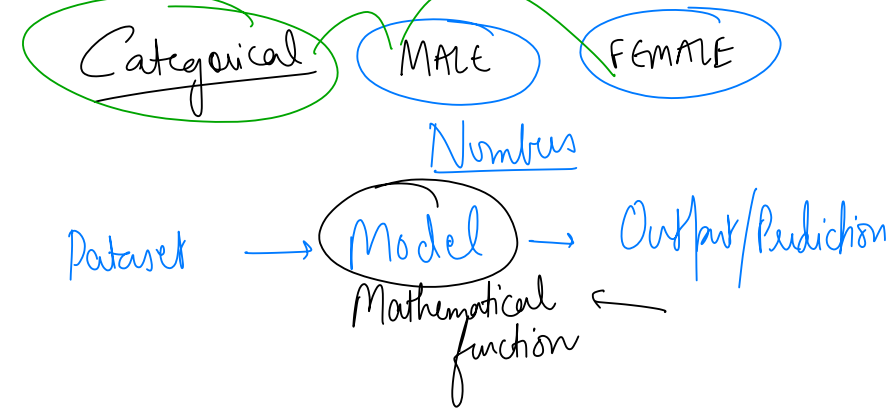

Since the model is basically a mathematical function which only understands numbers. we need to convert our categorical data into numerical data.  

<font color='purple'>How do we do that? </font>

There are 3 ways:

1. One Hot Encoding
2. Lable Encoding
3. Target Encoding

#### <font color='green'>One Hot Encoding</font>

Let's understand it with an example


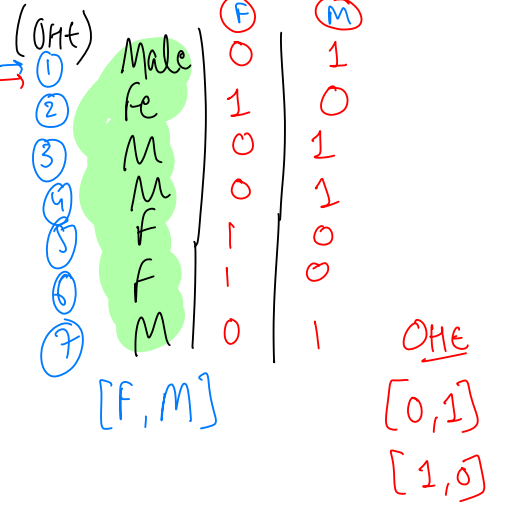

I have a dataset here, what do we do here?

- We'll create a dictionary with 2 values $[F, M]$. Based on these dictionary values I'll create 2 columns $F$ and $M$.  

- Now row number 1 has the value "M" so in column $F$ I'll put 0 and in column $M$ I'll put 1 which basically indicates that row number 1 in the dataset has the value "MALE"    

- We are creating a vector here where 1st position represents whether the person is female or not and the 2nd position represents whether the person is male or not.  

- **1 means yes, 0 means No**

Similarly, We'll fill columns $F$ and $M$ using 0s and 1s  

In ML1 we'll do it in more detail.

#### <font color='green'>Label Encoding</font>  

- Let's take the same dataset. Here we are going to just label them with some values.  

- **Male: 0 and Female: 1**

- There is a problem with this, if we have only 2 categories in the dataset like here we have "Male" and "Female" then Label encoders are best option, it'll work without any problem.







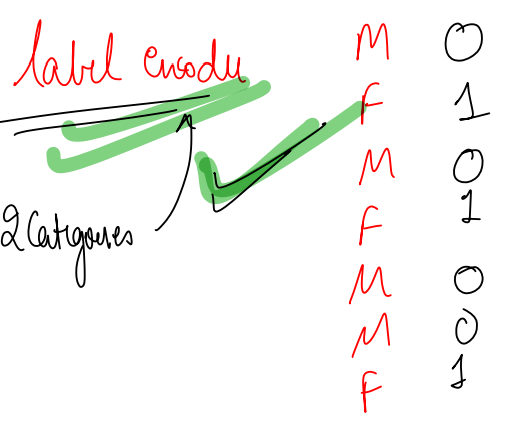

Now what is the problem in the situation?  

- We are representing different categories here basically more than 2 categories.  

- Suppose we have 5 different categories A, B, C, D, E and if we apply label encoding on it then  

  Cat A -> 0  
  Dog B -> 1  
  Elephant c -> 2  
  Turtle D -> 3  
  Rat E -> 4  

<font color='purple'>What is the problem here?</font>  

- While converting these categories into numbers we unknowingly introduced a problem which is an **order**    

- Model only understands numbers. There is some sense of "order" involved here  that $0 < 1 < 2 < 3 < 4$  

- Simultaneously these labels are mapped to categories so it generally seems like  $Cat < Dog < Elephant < Turtle < Rat$  but there is no relation between them which can decide this order.  

- So, the model will be biased to those numbers which have higher values.
  - Here which is 4 mapped to the category "Rat" so the model will give more weight or more importance to it and it'll create bias which is a problem.






So in these where we have more than 2 categories, I'm going to work with "Target Encoding".
  - "Label Encoding" in this is not advisable.  

We can also work with OHE in this situation but "Target Encoders" are preferable as OHE creates "Sparse Data"  
  - This means there are so many 0s and only a single 1.

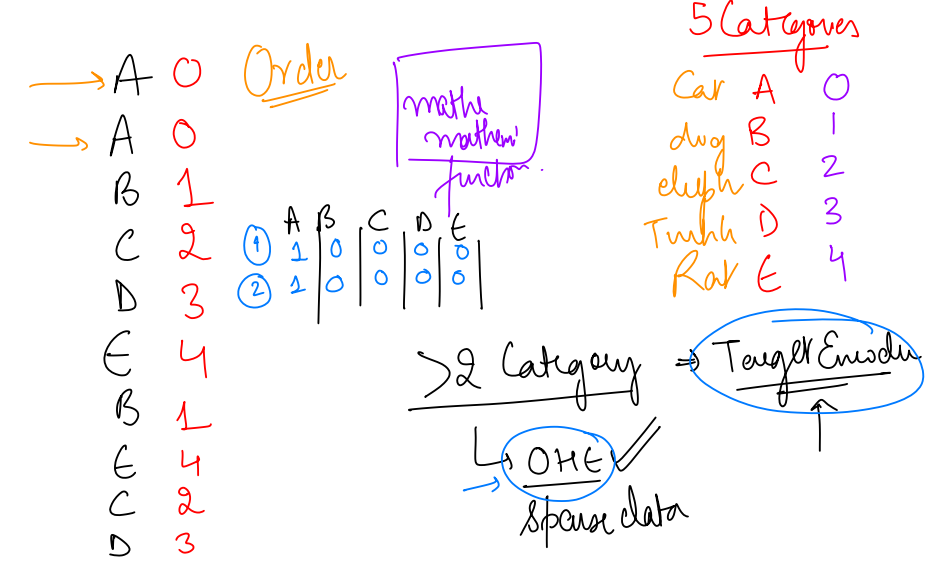

First let's  find out all the categorical columns

In [ ]:
cat.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Income_bin', 'TotalIncome_bin', 'Able_to_pay_EMI',
       'Credit_History'],
      dtype='object')

Let's start working on each column one by one.
- First with **Loan Status**

In [ ]:
Target.value_counts()

Y    325
N    133
Name: Loan_Status, dtype: int64

As it has only 2 categories we can use Lable Encoder here to convert loan status into numerical.


In [ ]:
from sklearn.preprocessing import LabelEncoder

Here also it is the class so we have to create the instance of the class and then using fit_transform we have to apply it to our column.

In [ ]:
col='Loan_Status'
label_encoder=LabelEncoder()
df_iqr[col]=label_encoder.fit_transform(df_iqr[col])
df_iqr[col].value_counts()

1    325
0    133
Name: Loan_Status, dtype: int64

- You can clearly see here before this our data was categorical $Y$ and $N$, not it got converted into numerical data.
- $1$ represents $Y$ and $0$ represents $N$
- We can do the same process for the other columns as well as having 2 categories like:  

   - Gender
   - Married
   - Education

By creating an instance of the LableEncoder class we can reuse that object directly and we don't need to every time run it.



In [ ]:
col="Gender"
df_iqr[col]=label_encoder.fit_transform(df_iqr[col])
df_iqr[col].value_counts()

col="Married"
df_iqr[col]=label_encoder.fit_transform(df_iqr[col])
df_iqr[col].value_counts()

col="Education"
df_iqr[col]=label_encoder.fit_transform(df_iqr[col])
df_iqr[col].value_counts()

0    353
1    105
Name: Education, dtype: int64

But what if we have more than 2 categories?

In [ ]:
col="Property_Area"
df_iqr[col].value_counts()

Semiurban    178
Rural        143
Urban        137
Name: Property_Area, dtype: int64

Now, here you can see we have **more than 2 categories** and we can't represent them with labels 0, 1 and 2 it'll create an order within the categories  

Here we are going to use **Target Encoding**

#### <font color='green'>Target Encoding</font>

In [ ]:
pip install --upgrade category_encoders

In [ ]:
from category_encoders import TargetEncoder

- Now before doing the process again, let's see what exactly the Target Encoding doing   

- Target Encoding is with respect to the target column, what is our target column it is Loan Status  

- So, I'll create a crosstab with a target column and property_area column.

In [ ]:
pd.crosstab(df_iqr["Property_Area"], df_iqr["Loan_Status"])

Loan_Status,0,1
Property_Area,,
Rural,52,91
Semiurban,36,142
Urban,45,92


- What does this number represent that **52** persons belong to **Rural Area** and their loan status is not approved (0)  

- My target here is I want to understand whether the loan is accepted so my target column is loan status and the target value is 1.

- If I want to find the percentage here, how will I find it? can I use the parameter "normalize" here  



In [ ]:
pd.crosstab(df_iqr["Property_Area"], df_iqr["Loan_Status"],normalize="index")

Loan_Status,0,1
Property_Area,,
Rural,0.363636,0.636364
Semiurban,0.202247,0.797753
Urban,0.328467,0.671533


<font color='purple'>Here can anyone tell what 0.63 represents?</font>

- Is it representing  $P(LS = 1 \mid PA = "Rural")$ or $P(PA = "Rural" \mid LS = 1)$

- The 1st one is right as I'm dividing it based on the index.

- 1st means there is a 63% probability that loan status will be 1 given that the property area is **rural**.  

Now can I use our Target Values (1) as targets?  

- When we are converting categorical data into numerical data using Target Encoders basically represents these categories in terms of their "**probabilities**".



In [ ]:
# pd.crosstab(data["Property_Area"], data["Loan_Status"],margins=True)

In [ ]:
col="Property_Area"
te=TargetEncoder()

# here I need to pass 2 things as parameters. 1st the column that I'm working on
# 2nd the Target column

df_iqr[col]=te.fit_transform(df_iqr[col],df_iqr["Loan_Status"])
df_iqr[col].value_counts()

0.797753    178
0.636364    143
0.671533    137
Name: Property_Area, dtype: int64

Can you see that the categorical values got replaced by the numerical values which are basically the same as their probabilities?

- You can notice the values are the same as crosstab. Here values are:
    - 0.79 -> Semiurban  
    - 0.67 -> urban  
    - 0.63 -> Rural   

So target encoding basically represents probabilities of success given these categories.  

- Here there is one problem, you can see there is also order involved but the difference between the 2 values is not too much.


Is this clear to everyone?

Now , apply the same process to convert the remaining columns as well like.

  - Self_Employed
  - Dependents
  - Income_bin
  - TotalIncome_bin



In [ ]:
# include remaining features in a single cell

col="Self_Employed"
te=TargetEncoder()
df_iqr[col]=te.fit_transform(df_iqr[col],df_iqr["Loan_Status"])
df_iqr[col].value_counts()

col="Dependents"
te=TargetEncoder()
df_iqr[col]=te.fit_transform(df_iqr[col],df_iqr["Loan_Status"])
df_iqr[col].value_counts()

col="Income_bin"
te=TargetEncoder()
df_iqr[col]=te.fit_transform(df_iqr[col],df_iqr["Loan_Status"])
df_iqr[col].value_counts()

col="TotalIncome_bin"
te=TargetEncoder()
df_iqr[col]=te.fit_transform(df_iqr[col],df_iqr["Loan_Status"])
df_iqr[col].value_counts()

0.700000    190
0.735135    185
0.725803     44
0.627644     39
Name: TotalIncome_bin, dtype: int64

since total income bin is the last code so we are getting the output of that code only.

Now, let's check the data type if any column is still an **object** datatype or not.

In [ ]:
df_iqr.dtypes

Gender                    int64
Married                   int64
Dependents              float64
Education                 int64
Self_Employed           float64
ApplicantIncome           int64
CoapplicantIncome       float64
LoanAmount              float64
Loan_Amount_Term        float64
Credit_History          float64
Property_Area           float64
Loan_Status               int64
Income_bin              float64
TotalIncome             float64
TotalIncome_bin         float64
Loan_Amount_per_year    float64
EMI                     float64
Able_to_pay_EMI           int64
dtype: object

In [ ]:
s = (df_iqr.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

[]

We have converted all the Categorical features to Numeric.

## <font color='blue'>Column Normalization and Standardization</font>

<font color='purple'>Why do we even care about normalizing or standardizing the data?</font>

- Consider the features total_income and the dependents, they both are very different ranges.
  - The dependents vary between [1, 3], whereas
  - The total_income varies between [1442, 81000] sq. ft.

- The Machine Learning model will get biased towards a larger quantity, and hence the total feature will be preferred all the time.

- But in the real world, we don't want to have biases between the features based on the values they contain.
- Hence we perform normalization to convert the features to a similar range.


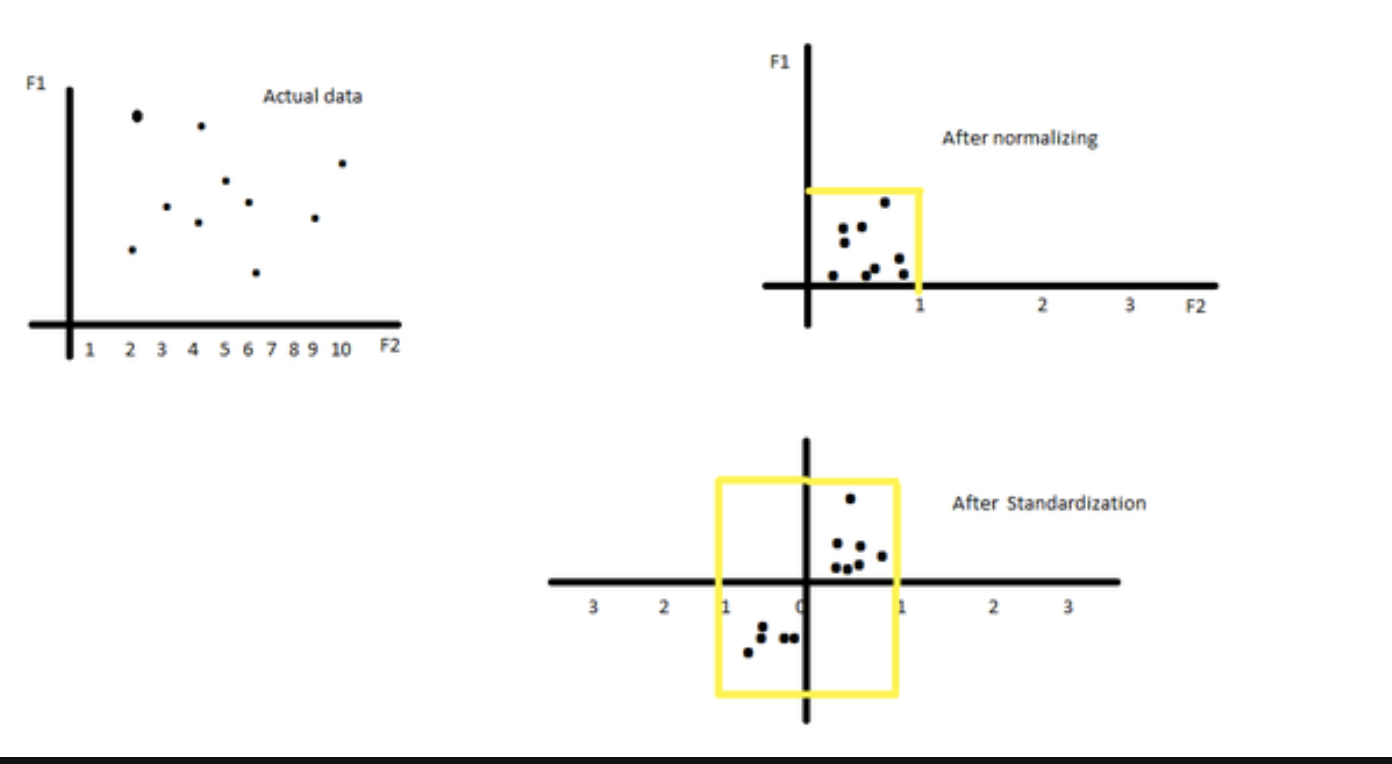

### <font color='blue'>Numerical Data</font>

The data may contain the variables of the different numerical scales. We scale the variable to get all the variables in the same range.

With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

Here, we study two techniques to normalize the data.

We have seen how to handle categorical features. Now, let's see how to handle numerical features.

<font color='green'>**Standardization:**</font>

- It will transform features coming from any distribution so that, it will have zero mean and unit variance.
- Geometrically, column standardization means squishing the data points such that the mean vector comes at origin and the variance(by either squishing or expanding) on any axes would be 1 in the transformed space.
- Column standardization is often called mean centring and variance scaling.
- $X_{new}$ = $\frac{(x - mean(x))}{std(x)}$

#### <font color='purple'>Standard Scaler</font>

The `StandardScaler()` is present in the sklearn library that normalizes the data such that the **mean** is **zero** and the **standard deviation** is **1**.

This method does not change the shape of the original distribution.

In [ ]:
num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,TotalIncome,Loan_Amount_per_year,EMI
0,5849,0.0,128.0,30.0,5849.0,4.383333,365.277778
1,4583,1508.0,128.0,30.0,6091.0,4.266667,355.555556
2,3000,0.0,66.0,30.0,3000.0,2.200000,183.333333
3,2583,2358.0,120.0,30.0,4941.0,4.000000,333.333333
4,6000,0.0,141.0,30.0,6000.0,4.700000,391.666667


Let's check for one variable.

Check the minimum and maximum values of the LoanAmount.

In [ ]:
# calculate the minimum and maximum values of the variable
print(" The minimum value of the LoanAmount:",df_iqr['LoanAmount'].min(),"\n",
      "The maximum value of the LoanAmount:", df_iqr['LoanAmount'].max())

 The minimum value of the LoanAmount: 9.0 
 The maximum value of the LoanAmount: 260.0


Standardize the variable to reduce the scale of the data.

In [ ]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

# instantiate the standardscaler
standard_scale = StandardScaler()

# fit the StandardScaler
num['Scaled_LoanAmount'] = standard_scale.fit_transform(num[['LoanAmount']])

# calculate the minimum and maximum values of the variable
print(" The minimum value of the sales:",num['Scaled_LoanAmount'].min(),"\n",
      "The maximum value of the sales:", num['Scaled_LoanAmount'].max())

 The minimum value of the sales: -2.7081096824702664 
 The maximum value of the sales: 2.979741979703463


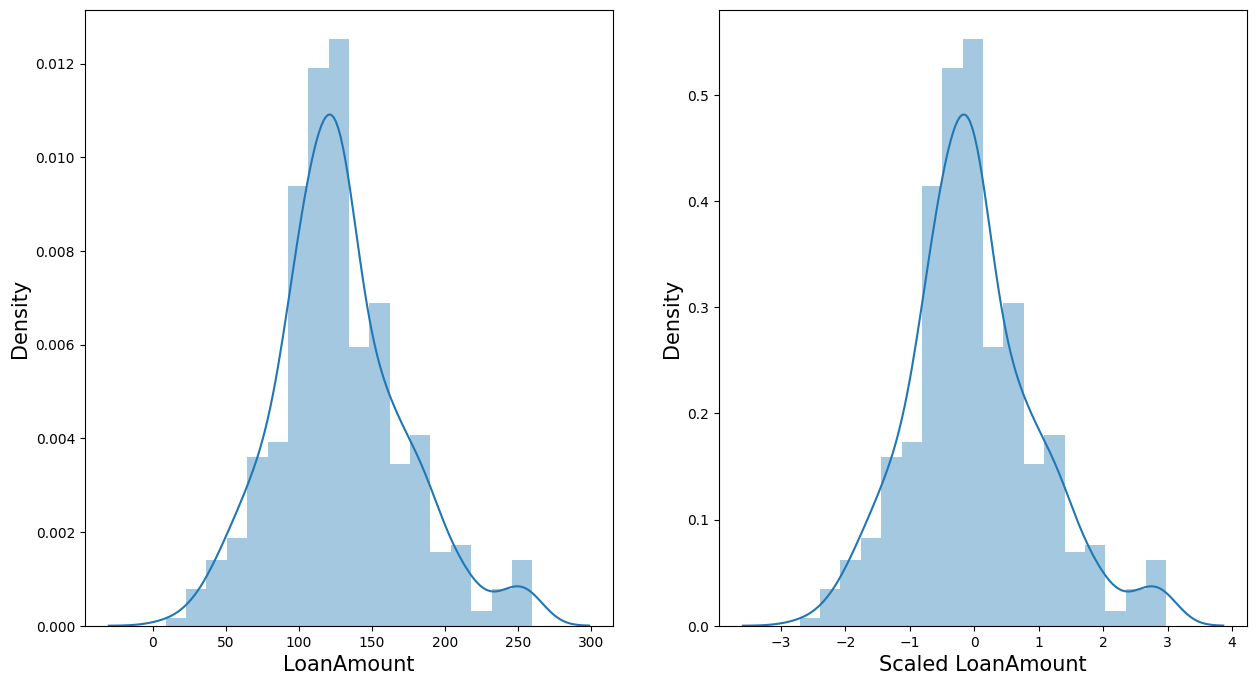

In [ ]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# subplot is used to create a set of plots
# we create a subplot of 1 row by 2 columns
# use first column for plotting
plt.subplot(1,2,1)

# plot the distribution of the original variable
# axlabel: label the x-axis
sns.distplot(num['LoanAmount'])
# set label for the y-axis
plt.ylabel('Density', fontsize=15)
# set label for x-axis
plt.xlabel('LoanAmount', fontsize=15)

# We create a subplot of 1 row by 2 columns
# use the second column for plotting
plt.subplot(1,2,2)

# plot the distribution of the scaled variable
# axlabel: label the x-axis
sns.distplot(num['Scaled_LoanAmount'])
# set label for the y-axis
plt.ylabel('Density', fontsize=15)
# set label for the x-axis
plt.xlabel('Scaled LoanAmount', fontsize=15)
# display the plot
plt.show()

Here you can see from the above plots that there is only a change in the x-axis range. But there is no change in the distribution.

In [ ]:
# check the mean and standard deviation of the scaled variable
print("The mean of the scaled variable:", num['Scaled_LoanAmount'].mean(),"\n",
      "The standard deviation of the scaled variable:", num['Scaled_LoanAmount'].std())

The mean of the scaled variable: 1.2023375987206936e-16 
 The standard deviation of the scaled variable: 1.0010934940391132


#### <font color='purple'>Min-Max Normalization</font>

<font color='green'>**Normalization:**</font>

- It is to make variables comparable to each other. Normalization is the process of reducing measurements to a “neutral” or “standard” scale.

Therefore, in order to have a methodology which is completely independent of scale of measurement, normalization is used.
- Converts values between $[0, 1]$.
- $x_{normalized}$ = $\frac{(x — x_{min})}{(x_{max} — x_{min})}$

Min-max normalization is another method to normalize the data.

It performs a linear transformation on the data. The normalized values will be between 0 and 1.

Use the 'MinMaxScaler' from sklearn to normalize the variable.

In [ ]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# instantiate the MinMaxScaler
min_max = MinMaxScaler()

# fit the MinMaxScaler
num['minmax_LoanAmount'] = min_max.fit_transform(num[['LoanAmount']])

# minimum and maximum value of the normalized variable
num['minmax_LoanAmount'].min(), num['minmax_LoanAmount'].max()

(0.0, 1.0)

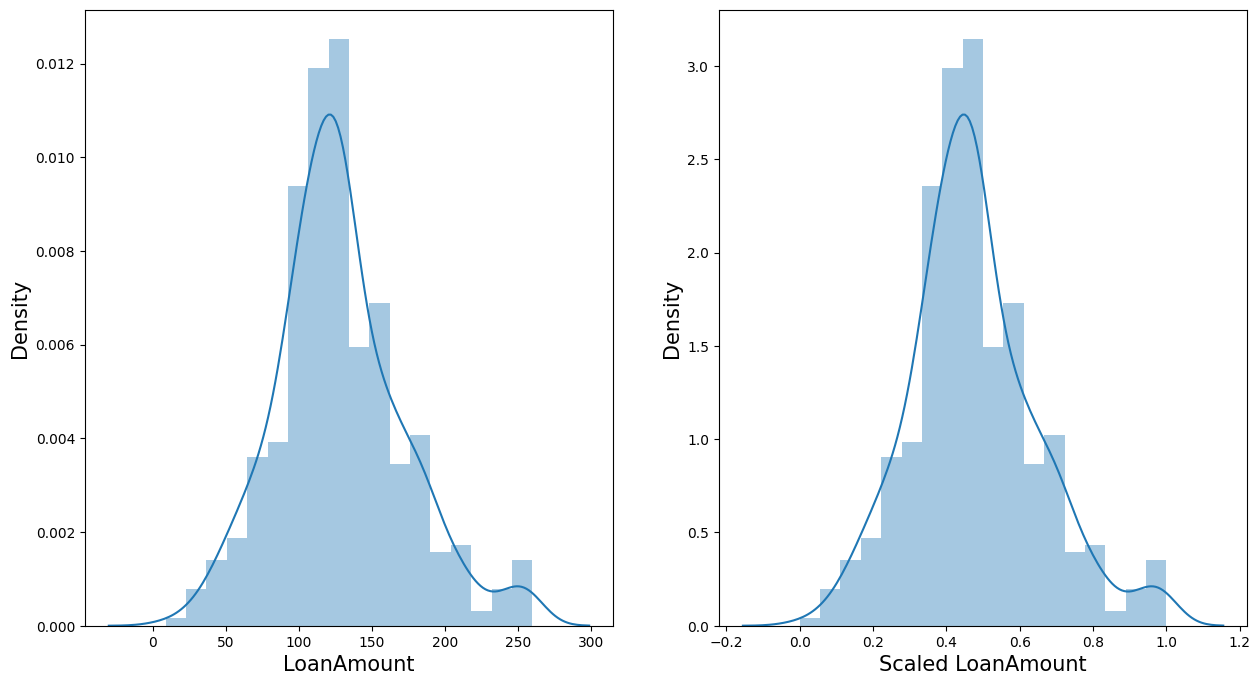

In [ ]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# subplot is used to create a set of plots
# We create a subplot of 1 row by 2 columns
# use the first column for plotting
plt.subplot(1,2,1)

# plot the distribution of the original variable
# axlabel: label the x-axis
sns.distplot(num['LoanAmount'], axlabel='LoanAmount')
# set label for the y-axis
plt.ylabel('Density', fontsize=15)
# set label for the x-axis
plt.xlabel('LoanAmount', fontsize=15)

# we create a subplot of 1 row by 2 columns
# use the second column for plotting
plt.subplot(1,2,2)

# plot the distribution of the scaled variable
# axlabel: label the x-axis
sns.distplot(num['minmax_LoanAmount'], axlabel='Scaled LoanAmount')
# set label for the y-axis
plt.ylabel('Density', fontsize=15)
# set label for the x-axis
plt.xlabel('Scaled LoanAmount', fontsize=15)

# display the plot
plt.show()

<font color='purple'>**When to use Normalization and Standardisation?**</font>

- **Normalization** is good to use when you know that the distribution of your data **does not follow a Gaussian distribution**.
- **Standardization**, on the other hand, can be helpful in cases where the data **follows a Gaussian distribution**.

However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range.

So, even if you have outliers in your data, they will not be affected by standardization.

However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using.

There is no hard and fast rule to tell you when to normalize or standardize your data.

You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.

To convert the complete data let's first perform the shapiro test to check the normality of the data.

In [ ]:
import scipy
from scipy.stats import shapiro
# Normality test

In [ ]:
num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,TotalIncome,Loan_Amount_per_year,EMI,Scaled_LoanAmount,minmax_LoanAmount
0,5849,0.0,128.0,30.0,5849.0,4.383333,365.277778,-0.011479,0.474104
1,4583,1508.0,128.0,30.0,6091.0,4.266667,355.555556,-0.011479,0.474104
2,3000,0.0,66.0,30.0,3000.0,2.200000,183.333333,-1.416446,0.227092
3,2583,2358.0,120.0,30.0,4941.0,4.000000,333.333333,-0.192765,0.442231
4,6000,0.0,141.0,30.0,6000.0,4.700000,391.666667,0.283111,0.525896


In [ ]:
num.drop(['Scaled_LoanAmount','minmax_LoanAmount'],axis=1,inplace=True)
for i in num.columns:
    print('Column',i,':',shapiro(num[i]))

Column ApplicantIncome : ShapiroResult(statistic=0.9215286374092102, pvalue=1.0194378639318512e-14)
Column CoapplicantIncome : ShapiroResult(statistic=0.8516969680786133, pvalue=2.3175524734268783e-20)
Column LoanAmount : ShapiroResult(statistic=0.9753210544586182, pvalue=5.346127522898314e-07)
Column Loan_Amount_Term : ShapiroResult(statistic=1.0, pvalue=1.0)
Column TotalIncome : ShapiroResult(statistic=0.9550978541374207, pvalue=1.3814373256426649e-10)
Column Loan_Amount_per_year : ShapiroResult(statistic=0.9740906953811646, pvalue=2.942669823369215e-07)
Column EMI : ShapiroResult(statistic=0.974090576171875, pvalue=2.94250241950067e-07)


Since all the columns are not normally distributed we can use **minmax normalization** to scale the data.

In [ ]:
mm = MinMaxScaler()
mmsfit = mm.fit(num)
df_scaled = pd.DataFrame(mm.fit_transform(num),columns=num.columns)
df_scaled.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,TotalIncome,Loan_Amount_per_year,EMI
0,0.570528,0.000000,0.474104,0.0,0.414153,0.488048,0.488048
1,0.443788,0.268089,0.474104,0.0,0.436895,0.474104,0.474104
2,0.285314,0.000000,0.227092,0.0,0.146415,0.227092,0.227092
3,0.243568,0.419200,0.442231,0.0,0.328822,0.442231,0.442231
4,0.585644,0.000000,0.525896,0.0,0.428343,0.525896,0.525896




### Extra Question: <font color="purple">Is Feature Scaling a substitute for Outlier Treatment?</font>

No.

While feature scaling can make algorithms more robust to differences in scale, it doesn't handle outliers.

It primarily focuses on adjusting the scale or range of feature values.

For instance
- In Min Max Scaler,
  - It scales the values to a specific range, often [0, 1].
  - While extreme values will be brought closer to the range, they still exist within it.
  - Further, it would directly impact the value of `x_max` and `x_min`
- In Standardization
  - It transforms values to have a mean of 0 and a standard deviation of 1.
  - Outliers may still have a substantial impact on the standard deviation.

In fact, both StandardScaler and MinMaxScaler are very sensitive to the presence of outliers.

They cannot guarantee balanced feature scales in the presence of outliers.

For addressing outliers, additional techniques may be employed, such as:

- Capping extreme values to a specified percentile.
- Applying mathematical transformations like log or square root to make the distribution more symmetric.
- Removing data points that are identified as outliers based on certain criteria.

---